In [72]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [73]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [74]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect
from sqlalchemy import func

In [75]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [76]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with= engine)


In [77]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [78]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [79]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [80]:
# look at first row to see columns etc
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x130b8be20>,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [89]:
# Find the most recent date in the data set.
most_recent_date =(session.query(Measurement.date)
             .order_by(Measurement.date.desc())
                .first())
most_recent_date
type(most_recent_date)

sqlalchemy.engine.row.Row

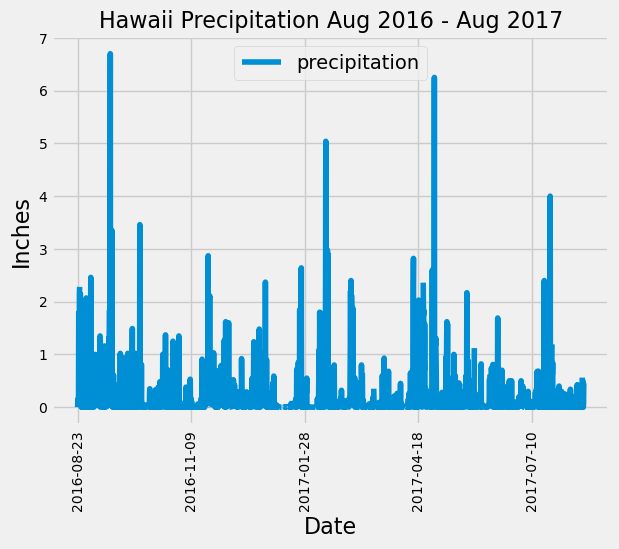

In [113]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_date
# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter\
(Measurement.date >= one_year_date).order_by(Measurement.date).all()
results
# Save the query results as a Pandas DataFrame. Explicitly set the column names
hawaii_df = pd.DataFrame(results, columns =['date', 'precipitation'])
hawaii_df.head()
# Sort the dataframe by date
hawaii_df.set_index(hawaii_df['date'], inplace =True)
hawaii_df
# hawaii_df = hawaii_df.drop('date', axis=1)
# hawaii_df
# Use Pandas Plotting with Matplotlib to plot the data
hawaii_df.plot('date', 'precipitation')


plt.xlabel("Date",  size = 16)
plt.ylabel("Inches", size = 16)
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017", size = 16)
plt.legend(["precipitation"],loc='upper center')
plt.xticks(rotation=90, size = 10)
plt.yticks(size = 10)
plt.show()

In [83]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()